<a href="https://colab.research.google.com/github/vamsi652/TestlineAssignment/blob/master/Testline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Personalized Recommendations:
Weak Areas:  [{'quiz': 'Human Reproduction', 'accuracy': 0.449438202247191}, {'quiz': 'Respiration and Gas Exchange', 'accuracy': 0.24}, {'quiz': 'principles of inheritance and variation ', 'accuracy': 0.2033898305084746}]
Strong Areas:  [{'quiz': 'Body Fluids and Circulation', 'accuracy': 0.8666666666666667}, {'quiz': 'Body Fluids and Circulation ', 'accuracy': 2.3768115942028984}, {'quiz': 'Reproductive Health', 'accuracy': 0.9454545454545454}, {'quiz': 'human health and disease ', 'accuracy': 2.731707317073171}, {'quiz': 'microbes in human welfare', 'accuracy': 3.8}, {'quiz': 'reproductive health ', 'accuracy': 2.3636363636363638}]
Performance Gaps:  []
Improvement Trends:  {'improved_topics': ['Body Fluids and Circulation', 'Body Fluids and Circulation ', 'Reproductive Health', 'human health and disease ', 'microbes in human welfare', 'reproductive health '], 'declining_topics': ['Human Reproduction', 'Respiration and Gas Exchange', 'principles of inhe

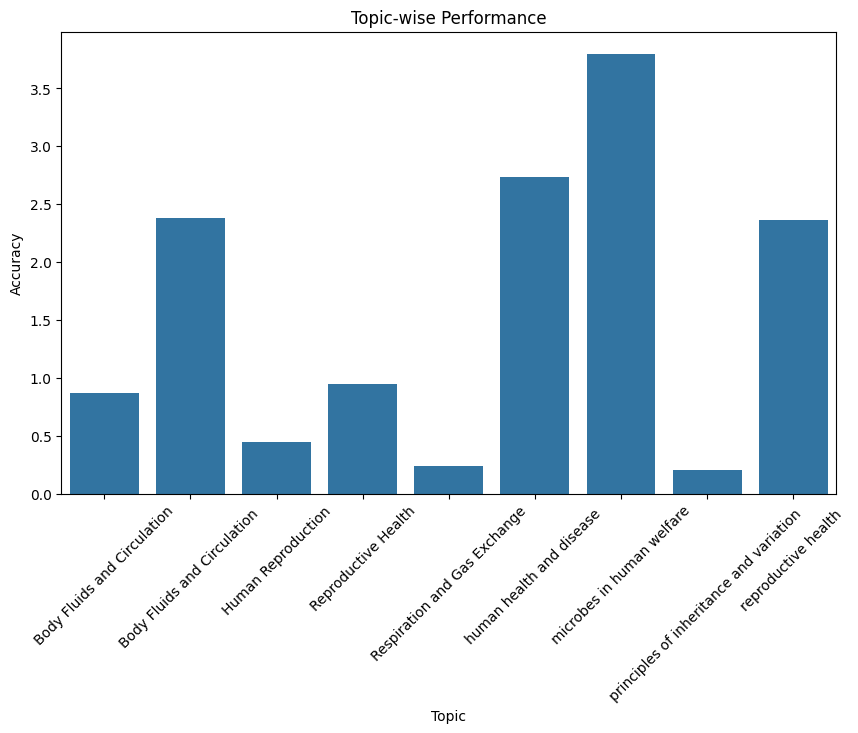

In [57]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

QUIZ_ENDPOINT_URL = "https://jsonkeeper.com/b/LLQT"
QUIZ_SUBMISSION_URL = "https://api.jsonserve.com/rJvd7g"
HISTORICAL_QUIZ_URL = "https://api.jsonserve.com/XgAgFJ"

def fetch_quiz_data():
    quiz_response = requests.get(QUIZ_ENDPOINT_URL, verify=False).json()
    submission_response = requests.get(QUIZ_SUBMISSION_URL).json()
    historical_response = requests.get(HISTORICAL_QUIZ_URL).json()
    return quiz_response['quiz'], submission_response, historical_response

def process_quiz_data(quiz_data, submission_data, historical_data):
    quiz_df = pd.DataFrame(quiz_data['questions'])
    submission_df = pd.DataFrame([submission_data])
    historical_df = pd.DataFrame(historical_data)
    return quiz_df, submission_df, historical_df

def analyze_performance(historical_df):
    historical_df['accuracy'] = historical_df['score'] / historical_df['total_questions']
    historical_df['quiz_topic'] = historical_df['quiz'].apply(lambda x: x['topic'] if isinstance(x, dict) and 'topic' in x else x)

    topic_performance = historical_df.groupby('quiz_topic')['accuracy'].mean().reset_index()
    topic_performance.columns = ['quiz', 'accuracy']

    weak_areas = topic_performance[topic_performance['accuracy'] < 0.5]
    strong_areas = topic_performance[topic_performance['accuracy'] >= 0.7]
    performance_gaps = topic_performance[topic_performance['accuracy'].isna()]

    return topic_performance, weak_areas, strong_areas, performance_gaps

def generate_recommendations(weak_areas, strong_areas, overall_accuracy):
    recommendations = {
        'focus_topics': weak_areas['quiz'].tolist(),
        'suggested_difficulty': 'Increase' if overall_accuracy > 0.7 else 'Maintain',
        'focus_more': 'Yes' if len(weak_areas) > 0 else 'No',
        'improvement_trends': {
            'improved_topics': strong_areas['quiz'].tolist(),
            'declining_topics': weak_areas['quiz'].tolist()
        }
    }
    return recommendations

def visualize_performance(topic_performance):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=topic_performance['quiz'], y=topic_performance['accuracy'])
    plt.title('Topic-wise Performance')
    plt.xlabel('Topic')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.show()

def main():
    quiz_data, submission_data, historical_data = fetch_quiz_data()
    quiz_df, submission_df, historical_df = process_quiz_data(quiz_data, submission_data, historical_data)
    topic_performance, weak_areas, strong_areas, performance_gaps = analyze_performance(historical_df)

    overall_accuracy = historical_df['accuracy'].mean()
    recommendations = generate_recommendations(weak_areas, strong_areas, overall_accuracy)

    print("Personalized Recommendations:")
    print("Weak Areas: ", weak_areas[['quiz', 'accuracy']].to_dict(orient='records'))
    print("Strong Areas: ", strong_areas[['quiz', 'accuracy']].to_dict(orient='records'))
    print("Performance Gaps: ", performance_gaps[['quiz', 'accuracy']].to_dict(orient='records'))
    print("Improvement Trends: ", recommendations['improvement_trends'])
    print("Focus more?: ", recommendations['focus_more'])
    print("Suggested Difficulty Adjustment: ", recommendations['suggested_difficulty'])

    visualize_performance(topic_performance)

if __name__ == "__main__":
    main()
